# Lesson 3: Introduction to Data Analysis


## 0.1 What does data look like?

When looking at biological data (or any dataset for that matter), we usually look at a table of **samples** by **features**. Samples may be grouped into classes, may have associated metadata, and are generally independent observations. For example, each sample might be a patient, a particular experiment run, or a single cell.

**Features** might also be called characteristics or variables, and they can generally be any type: categorical (`str`, such as disease type), numerical (`float` like expression of a gene or protein level, or `int` like the number of patients that visit a particular hospital), Boolean (`bool`, such as the presence or absence of a particular disease), etc. In `python`, the samples are often the rows and the features are often the columns, like below:

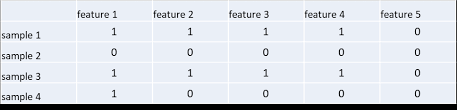

## 0.2: What is data analysis?

At this point, we've gone through data manipulation using `numpy` and `pandas`, and basic visualization using `matplotlib`. Whenever using data in research, it's always a great idea to start the same way: **explore the data and visualize it** in simple ways to get a feel for the dataset you are working with. Once you have a good understanding of the data itself, often the next step is to _analyze_ the data. When we refer to data analysis, we are usually talking about **using a computational model or tool to investigate whether the data fits a certain hypothesis.** 

If your data is labeled into different groups (e.g. case vs. control or a categorical label), you can use _supervised_ approaches to analysis. For example, you can try to **predict** a particular outcome (dependent variable) from several features (independent variables) such as by a **regression** model. Or we can build a model that would **classify** samples into the different known groups. Building such a model would help us identify which features are most important for the distinction between classes. Alternatively, you might want to run some **statistical tests** to see if different groups have significantly different features.

If our data is not labeled (or if we are "blind" to the labels), we would use an _unsupervised_ approach. For example, you might want to look at the data in fewer dimensions using a **dimensionality reduction** technique. This is an _unsupervised_ way to see patterns in your dataset, and is really useful when the data you are working with has tons of features (which biological data often does, such as expression or activity of several genes/proteins). You also might want to learn whether your data naturally **clusters** into multiple groups with distinct features. This is another _unsupervised_ approach to finding patterns in the data that might have distinct groups. This can be really useful if you are interested in distinct categories in the data; for example, do the cases and controls cluster separately from each other? Do your samples fall into different phenotypes?

_Note: technically these unsupervised and supervised approaches are types of machine learning, which is about coding programs that automatically adjust their performance from exposure to information encoded in the data. This is a subfield of Artificial Intelligence. More complicated ML methods, like neural networks, will not be covered in this JumpStart, but they are built on the same foundations as the methods described here. The below chart summarizes many of the algorithms supported by sklearn. Don't worry if you don't recognize these! We will go through a few of them below._

## 0.3 Representing data in `scikit-learn`

We will use a package called `scikit-learn` to implement our data analysis. This package includes functions for all of the techniques described above, as well as methods for data wrangling such as normalization and included some built-in datasets useful for testing any models you build.

We will import `scikit-learn` below:


In [1]:
import sklearn

Most algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

In the code below, we will use a mix of `numpy` arrays (which you learned in Day 1) and `pandas` DataFrames (which you learned earlier today).

We'll start with a basic dataset that is preloaded in sklearn: the iris dataset. You could import this dataset directly from sklearn below, but we already generated a csv file (using the commented out code below) that you'll import instead.

In [ ]:
# from sklearn.datasets import load_iris
# iris = load_iris()

# import pandas as pd

# iris_df = pd.DataFrame(iris.data, columns=iris.feature_names).assign(species=iris.target_names[iris.target])

# iris_df.to_csv('./data/iris.csv')

In [2]:
import pandas as pd

iris_df = pd.read_csv("./data/iris.csv", index_col = 0, header = 0)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 0.4 Review Problem Set

In [3]:
# Fill in the blanks below

# Can you print out summary statistics for each column in the iris dataset? 
# iris_df.___()


#Solution
iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# What data type are each of the features (columns)?
# iris_df.___()

#Solution
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
# How many samples fall into each category of "species"?
# iris_df.___.___()


#Solution
iris_df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Section 1: Linear Regression

We'll start by talking about a model you are probably familiar with from math class: linear regression, also known as finding a line of best fit. In the example below, we will work through a regression problem with one independent variable and one dependent variable, using the iris dataset.

### 1.1 Exploratory analysis

To get a sense of whether any of the features in our dataset are correlated, let's plot! We'll use `seaborn` to make a `pairplot`, which plots pairwise relationships in a dataset. This is one case where `seaborn` is much easier than `matplotlib`, because it will automatically make a grid of plots between all of your variables requiring very few arguments in the function. 

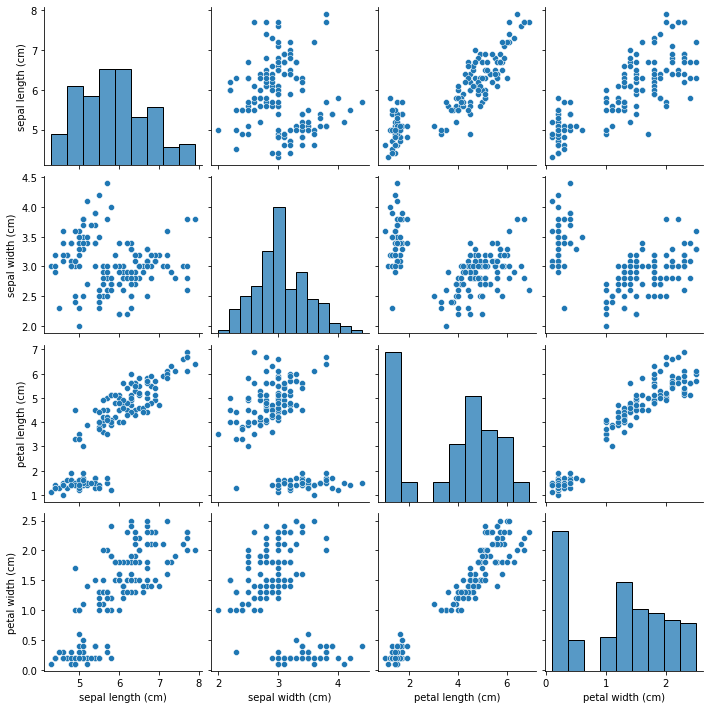

In [6]:
%matplotlib inline 
# Colab notebook function to make sure the plots show up in the notebook; not needed when running a python file
import seaborn as sns # Common abbreviation for seaborn
import matplotlib.pyplot as plt # Common abbreviation for matplotlib

sns.pairplot(iris_df)
plt.show() # not necessary in notebooks, but necessary to show plots in .py files

As shown above, `seaborn` function `pairplot` requires only one arguments: the `pandas` DataFrame. However, we can make this plot better by specifying the `hue` parameter to be `species` below:

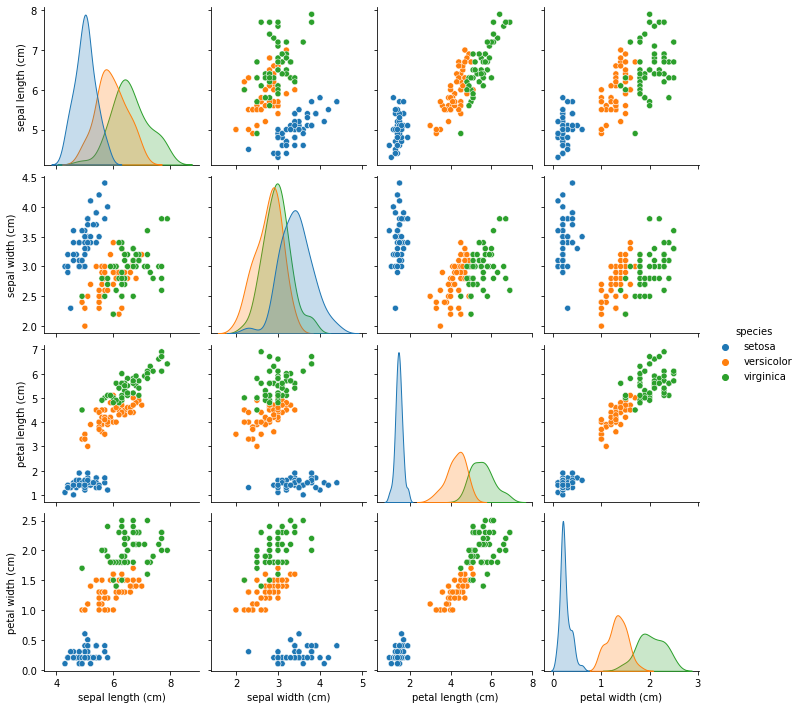

In [7]:
sns.pairplot(iris_df, hue = 'species')
plt.show()

### 1.2 Group Practice Problem: Match the plot!

Using the `seaborn` [documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for `pairplot`, can you match the plot below?


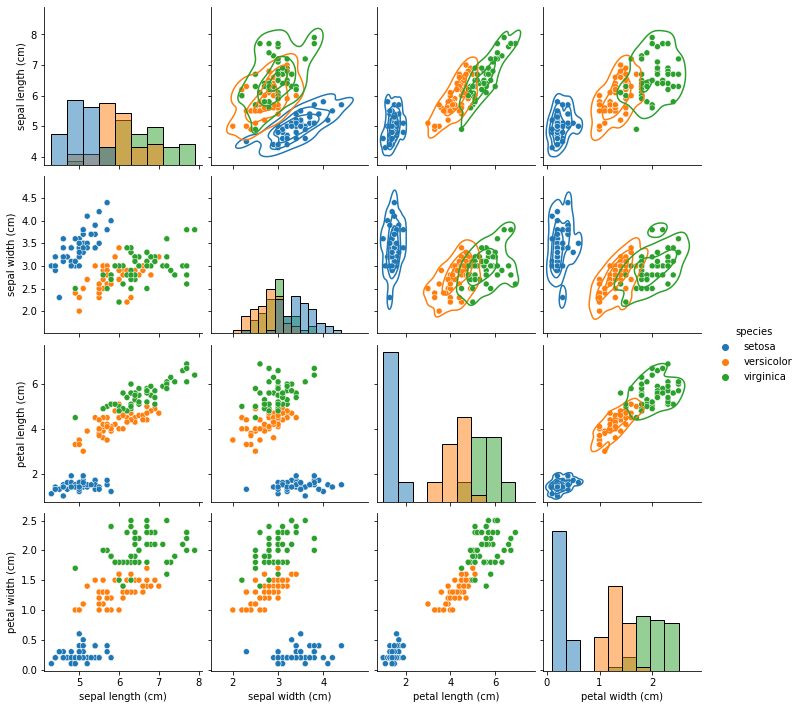

In [8]:
### Your code goes here

# Solution
g = sns.pairplot(iris_df, diag_kind="hist", hue = 'species')
g.map_upper(sns.kdeplot, levels=4, color=".2")

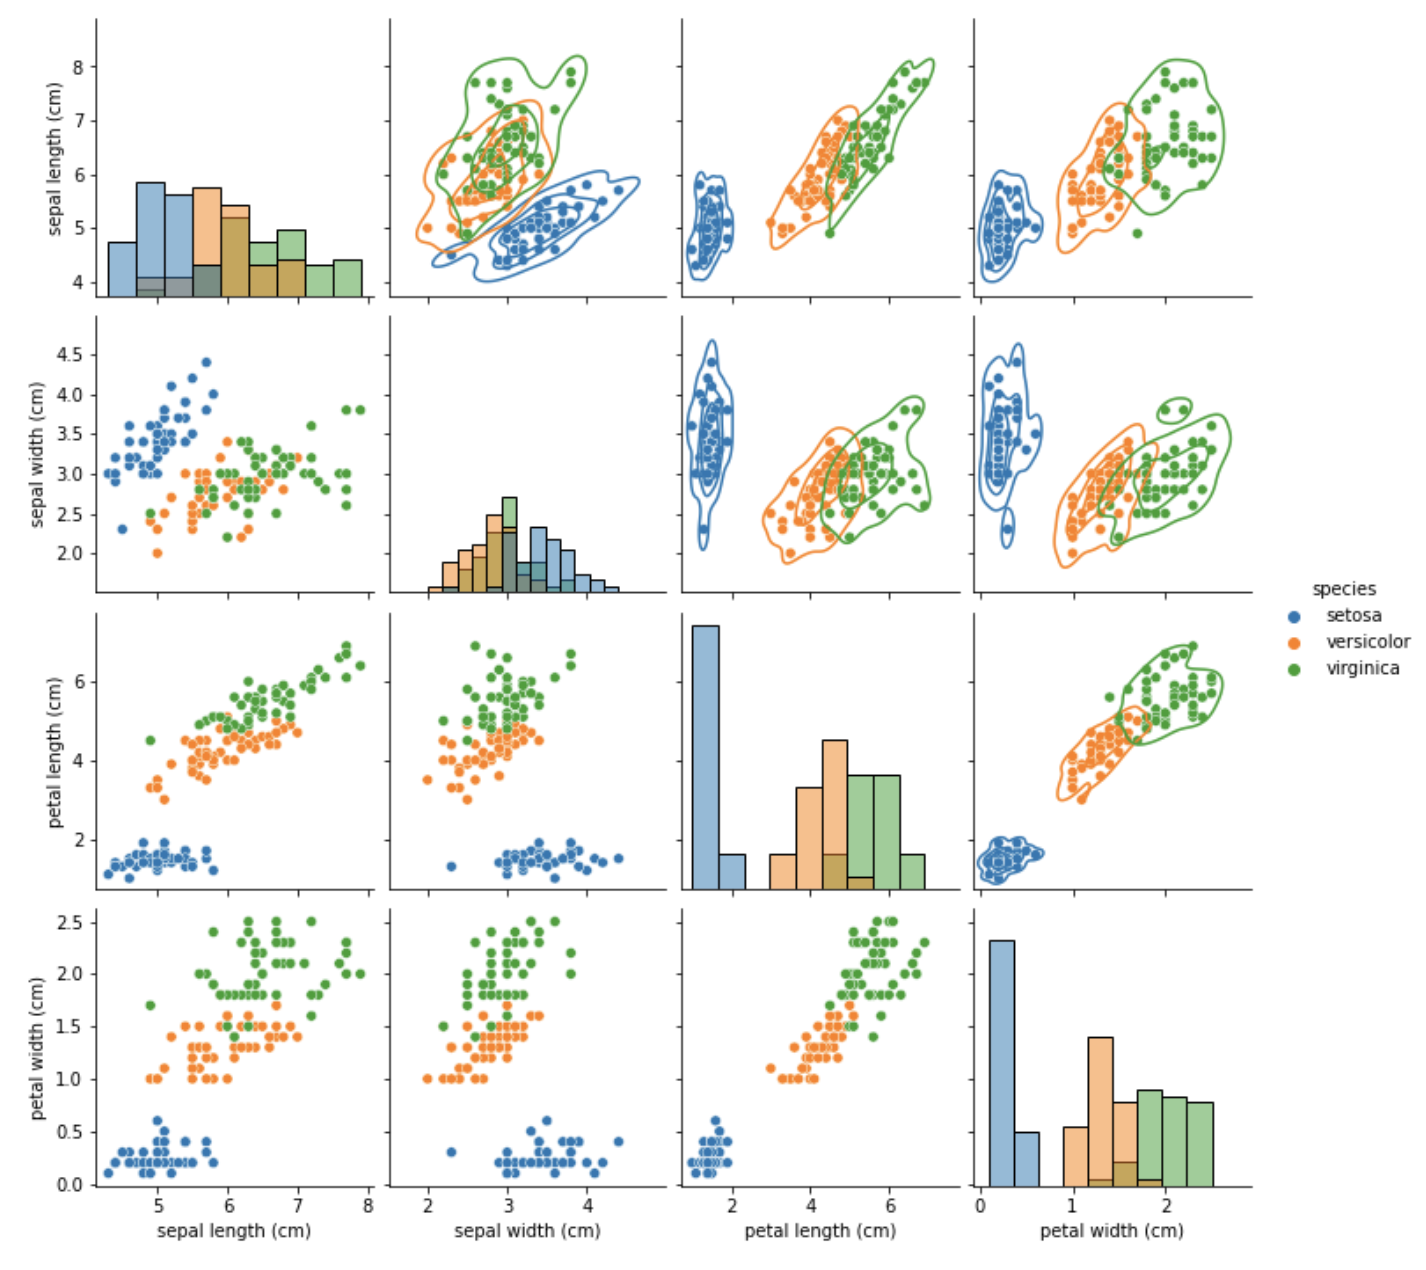

Now that we've visualized the data, we can see some possible linear relationships between variables (e.g. petal width and sepal length). Let's try to run a regression to see how well these variables are correlated.

### 1.3 Build a sklearn Regression Model

We will use the sklearn [package](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for LinearRegression models.

#### Step 1: import the correct module from sklearn


In [9]:
from sklearn.linear_model import LinearRegression

#### Step 2: define the input data


In [10]:
import numpy as np

x = np.array(iris_df['petal width (cm)']).reshape((-1, 1))
y = np.array(iris_df['sepal length (cm)'])

Notice we defined our independent variable, x, to be the petal width, and our dependent variable, y, to be the petal length.

Now, you have two arrays: the input, x, and the output, y. You should call .reshape() on x because this array must be two-dimensional, or more precisely, it must have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies.


The first five samples of x now look like:

In [11]:
x[0:5]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

and y:

In [12]:
y[0:5]

array([5.1, 4.9, 4.7, 4.6, 5. ])

#### Step 3: create a model 


In [13]:
model = LinearRegression()

Using the sklearn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for LinearRegression models, you can find the section called "Methods." These are all of the possible functions that our model can implement. the LinearRegression model has a method called fit(), which will find the line of best fit using x and y. When you run this, nothing will be returned but the model will be fit to the data we give it.

#### Step 4: fit the model


In [14]:
# model.___(x,y)

#Solution
model.fit(x,y)

LinearRegression()

#### Step 5: Get the results


We now would like to see the results of our model: for example, we can investigate the correlation using r-squared$^*$ ($r^2$), and we also want to know the intercept and the slope of the line of best fit.

$^*$ _The proportion of the variance in the response variable that can be explained by the predictor variable in the regression model_

In [15]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.6690276860464137


What is the equation for the line of best fit?

In [16]:
# print("intercept:", model.___)
# print("slope:", model.___)

#Solution
print("intercept:", model.intercept_)
print("slope:", model.coef_)

intercept: 4.7776294156015675
slope: [0.88858025]


#### Step 6: Predict new values using a built-in function of the model


What about if we have a new datapoint? For example, **if we have a new sample with a petal width of 0.6, what would it's predicted petal length be?**

In [19]:
# y_pred = model.___(___)
# print("Predicted value", y_pred)

# Predict new values using the line of best fit
# y_pred = model.___ + model.___ * x
# print("Predicted value", y_pred)

#Solution
print(model.predict([[0.6]]))
y_pred = model.intercept_ + model.coef_ * 0.6
print(y_pred)

[5.31077757]
[5.31077757]


### 1.4: Plotting the model results

There are a few different ways to plot the line of best fit on the plot. Because `matplotlib` function `plot` takes x and y pairs, we will use the model to predict all y values from all x values, and then plot x versus y_pred. 

In [20]:
y_pred = model.predict(x)

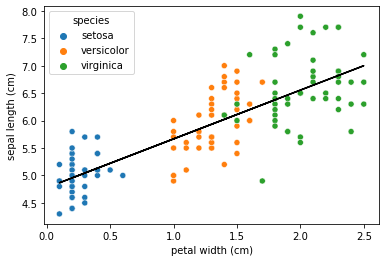

In [21]:
# Using matplotlib and/or seaborn, plot a scatterplot of the data with the line of best fit over top.
sns.scatterplot(x = iris_df['petal width (cm)'], y = iris_df['sepal length (cm)'], hue = iris_df['species'])
plt.plot(x, y_pred, color = 'black')
plt.show()

### 1.5 Group practice problem: Best r^2

Using the iris dataset, make a new Linear Regression model with the highest possible r^2.

In [ ]:
### Your code goes here

In [22]:
# The students should be able to look at the pairplot and see that petal length and width are most 
# highly correlated, so predicting one from the other will give a high r^2.
# Goal: get the students to think about building a model based off of multiple inputs, such as the one 
# below, which increases r^2 from ~.92 t ~.95.
x = np.array(iris_df[['petal width (cm)','sepal length (cm)']])

y = np.array(iris_df['petal length (cm)'])

model = LinearRegression()
model.fit(x,y)
print(model.score(x,y))

print(model.coef_)


0.9485236349446816
[1.74810286 0.54225562]


<div class="alert alert-block alert-info">
<i>Note: while we won't go into the coding details here, you can test how well a model extrapolates to new data by the following steps:</i>
1. Split the data into training and testing datasets using `sklearn` function `train_test_split`.
2. Fit the model to the training dataset (X_train, y_train).
3. Predict the dependent variable in the testing dataset (y_pred from X_test).
4. Compare the predicted values to the true values (y_pred vs y_test).
</div>


## Section 2: Statistical Testing

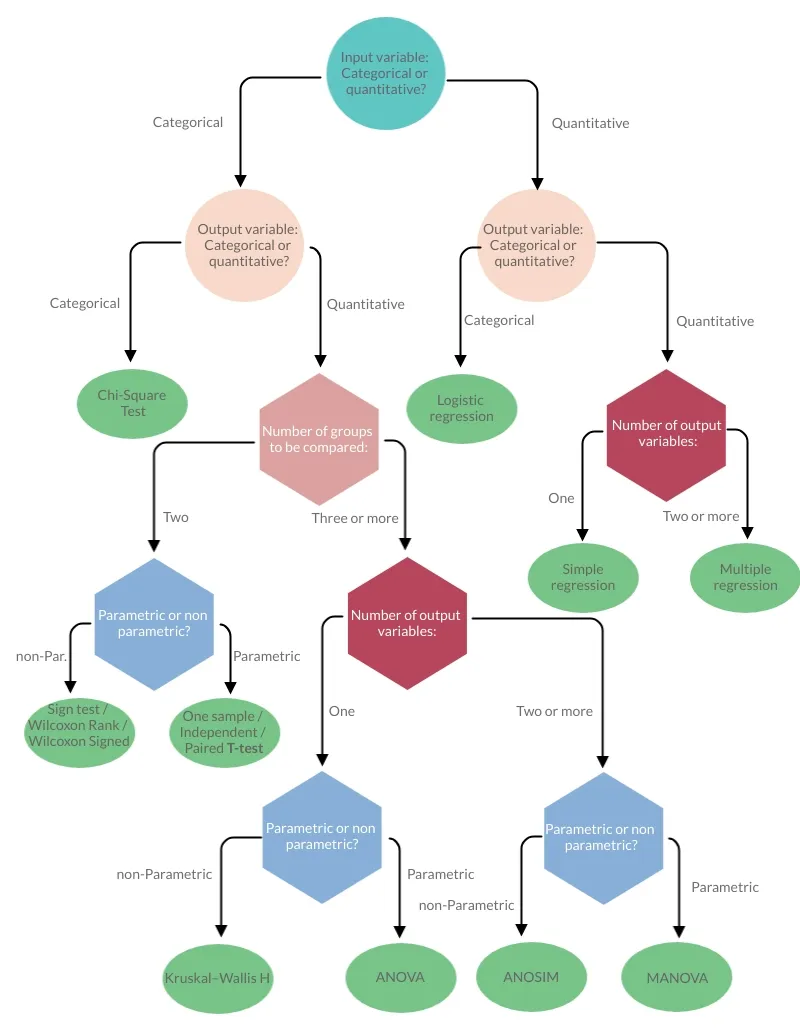

## 2.1: T-tests

We won't be going through all of the mathematical details of a t-test in this course, so if you need a refresher, visit this [page](https://www.pythonfordatascience.org/independent-samples-t-test-python/).

As a basic reminder, a t-test requires certain assumptions:

<div>
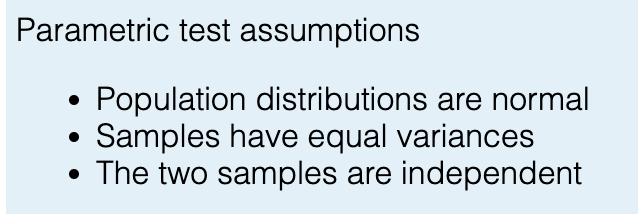
</div>


To do this, we will need to import a new module: `scipy.stats`. As you can probably tell from the name, this will be the go-to python package for statistical testing. This package also includes helpful functions for defining probability distributions, calculating summary statistics, and more advanced methods like Monte Carlo. The base package, `scipy`, can be used for everything from clustering (`cluster`) to fourier transforms (`fft`) to linear algebra (`linalg`).

In [23]:
import scipy.stats as ss #common abbreviation for this package

### Step 1: Decide which variables and groups to test

We can see from the pairplot we made earlier (reproduced here) that our population distributions for each variable are approximately normal^. We also know from `value_counts()` that we have the same number of samples in each category and that the samples are all independent. While the variances don't appear to be equal for all of the variables, we can see that they are approximately equal for sepal width^, so we'll run a t-test on that variable.

^_We can test that the populations are approximately normal using the function `shapiro` and variances are approximately equal using the function `levene` from `scipy.stats`, which we'll do below._

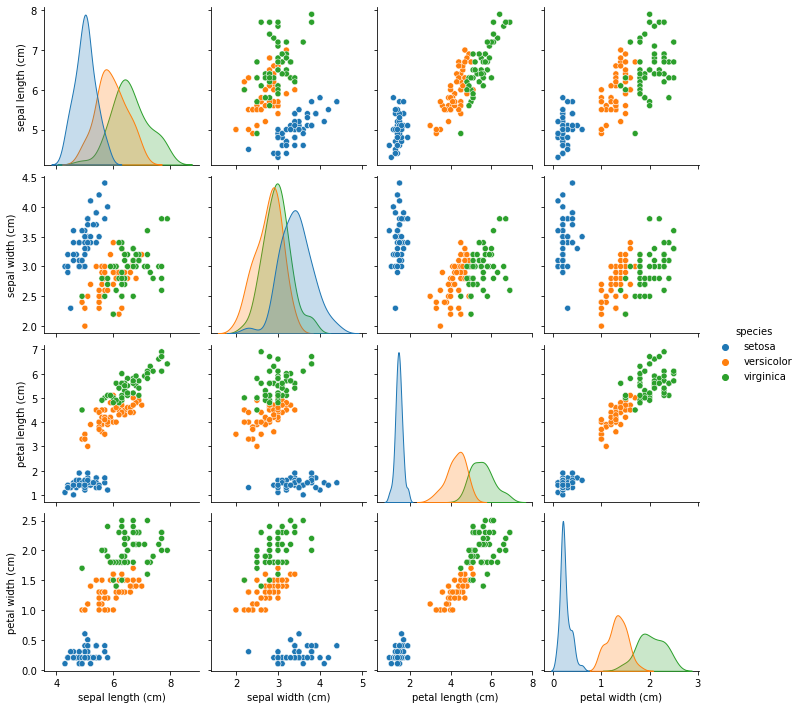

In [24]:
sns.pairplot(iris_df, hue = 'species')
plt.show()



A t-test assumes that the null hypothesis is true:
$$H_0: \mu_1-\mu_2 = 0$$

and then test whether there is evidence against this assumption. In other words, we want to test if the mean of two groups is significantly different from zero:
$$H_A: \mu_1-\mu_2 \neq 0$$



For a t-test, we need two independent groups. We'll test the sepal width of the Setosa Irises vs the Versicolor Irises (orange vs blue in pairplot above). We'll need to grab all the rows from our dataframe that have `iris_df['species'] == 'setosa'` and put them into a new dataframe, and likewise for the Versicolor Irises.

In [25]:
# setosa = iris_df[___]
# versicolor = iris_df[___]

#Solution
setosa = iris_df[(iris_df['species'] == 'setosa')]
versicolor = iris_df[(iris_df['species'] == 'versicolor')]


In [26]:
setosa.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step 2: Ensure assumptions for t-test hold 

In [27]:
# Test that the variances are not significantly different, an assumption of the t-test
ss.levene(setosa['sepal width (cm)'], versicolor['sepal width (cm)'])
# an insignificant p-value means we can proceed with a t-test

LeveneResult(statistic=0.591002044989776, pvalue=0.44388064024686147)

In [28]:
# Shapiro-Wilk test for normality
print(ss.shapiro(setosa['sepal width (cm)']))
print(ss.shapiro(versicolor['sepal width (cm)']))
# an insignificant p-values means each population is not significantly different from a normal distribution, and we can process with a t-test

ShapiroResult(statistic=0.97171950340271, pvalue=0.2715264856815338)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)


### Step 3: Conduct the t-test using `scipy.stats`

In [29]:
ss.ttest_ind(setosa['sepal width (cm)'], versicolor['sepal width (cm)'])


Ttest_indResult(statistic=9.454975848128596, pvalue=1.8452599454769322e-15)

**The t-test shows we can reject the null hypothesis that the means are the same. In other words, there is evidence for a statistically significant difference between sepal widths of Setosa Irises and Versicolor Irises.**

### Group Practice: T-test on two other groups for a different variable
Run through the same test for a different variable and any two of the three classes.

In [30]:
# Your code goes here
# Group 1: petal width, setosa and virginica
# Group 2, petal length, versicolor and virginica
# Group 3: sepal length, setosa and versicolor
# Group 4: petal width, versicolor and virginica
# Group 5: sepal width, versicolor and virginica

#Solutions
virginica = iris_df[(iris_df['species'] == 'virginica')]

#Group 1
print(ss.levene(setosa['petal width (cm)'], virginica['petal width (cm)'])) #variance assumption not met
print(ss.shapiro(setosa['petal width (cm)'])) #normality assumption not met
print(ss.shapiro(virginica['petal width (cm)'])) 
print(ss.ttest_ind(setosa['petal width (cm)'], virginica['petal width (cm)']))

#Group 2
print(ss.levene(versicolor['petal length (cm)'], virginica['petal length (cm)']))
print(ss.shapiro(versicolor['petal length (cm)']))
print(ss.shapiro(virginica['petal length (cm)']))
print(ss.ttest_ind(versicolor['petal length (cm)'], virginica['petal length (cm)']))

#Group 3
print(ss.levene(setosa['sepal length (cm)'], versicolor['sepal length (cm)'])) #variance assumption not met
print(ss.shapiro(setosa['sepal length (cm)']))
print(ss.shapiro(versicolor['sepal length (cm)']))
print(ss.ttest_ind(setosa['sepal length (cm)'], versicolor['sepal length (cm)']))

#Group 4
print(ss.levene(versicolor['petal width (cm)'], virginica['petal width (cm)'])) #variance assumption not met
print(ss.shapiro(versicolor['petal width (cm)'])) #normality assumption not met
print(ss.shapiro(virginica['petal width (cm)']))
print(ss.ttest_ind(versicolor['petal width (cm)'], virginica['petal width (cm)']))

#Group 5
print(ss.levene(versicolor['sepal width (cm)'], virginica['sepal width (cm)']))
print(ss.shapiro(versicolor['sepal width (cm)']))
print(ss.shapiro(virginica['sepal width (cm)']))
print(ss.ttest_ind(versicolor['sepal width (cm)'], virginica['sepal width (cm)']))

LeveneResult(statistic=38.99527480726189, pvalue=1.0946032170399146e-08)
ShapiroResult(statistic=0.7997642159461975, pvalue=8.65842082475865e-07)
ShapiroResult(statistic=0.9597718715667725, pvalue=0.08695744723081589)
Ttest_indResult(statistic=-42.7857975196172, pvalue=3.2303748184318025e-65)
LeveneResult(statistic=1.0674381993787974, pvalue=0.30406773202289633)
ShapiroResult(statistic=0.9660047888755798, pvalue=0.1584833413362503)
ShapiroResult(statistic=0.9621862769126892, pvalue=0.10977369546890259)
Ttest_indResult(statistic=-12.603779441384985, pvalue=3.1788195478061495e-22)
LeveneResult(statistic=8.172720533728683, pvalue=0.005195521631017526)
ShapiroResult(statistic=0.9776989221572876, pvalue=0.4595281183719635)
ShapiroResult(statistic=0.9778355956077576, pvalue=0.46473264694213867)
Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487079e-18)
LeveneResult(statistic=6.5454545454545485, pvalue=0.012046123630720964)
ShapiroResult(statistic=0.947626531124115, pvalue=0.

## 2.2: ANOVA

As shown in the flow chart above, if you want to compare multiple independent groups you can use an ANOVA. In `scipy.stats`, this is the `f_oneway` function, which tests the null hypothesis that two or more groups have the same population mean. ([Reference](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html))

### Group Practice: ANOVA on all three classes
Using the documentation above, can you run an ANOVA on all three classes for the sepal length variable?

In [35]:
# Your code goes here

# Hint: if you already defined DataFrames for setosa and versicolor groups, you don't need to redefine them here.
ss.f_oneway(np.array(setosa['sepal length (cm)']), np.array(virginica['sepal length (cm)']), np.array(versicolor['sepal length (cm)']))

F_onewayResult(statistic=119.26450218450468, pvalue=1.6696691907693826e-31)

## 2.3: Plotting Statistical Tests

Often the easiest and best way to plot the results of a statistical test is to use boxplots.

<AxesSubplot:xlabel='species', ylabel='sepal width (cm)'>

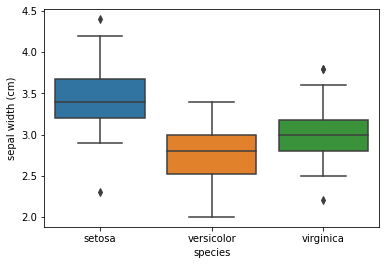

In [36]:
sns.boxplot(data = iris_df, x = 'species', y = 'sepal width (cm)')

We can use a new [package](https://github.com/trevismd/statannotations) called `statannot` to write on the plot the results of the statistical tests between pairs of groups. Note that `statannot` will run its own version of the test to generate results. Below, we are using the `test` argument to define the test type, `t-test_ind`, which will run pairwise t-tests with a correction (Bonferroni) for multiple comparisons.  We'll use a trick (following the `statannot` documentation) to define the axis `ax` of a figure, plot a boxplot on top, and then add annotations to that same axis `ax`. The `add_stat_annotation` method also outputs the results of the statistical tests if verbose > 0.

<div class="alert alert-block alert-info">
Importantly, this package DOES NOT test the assumptions for your chosen statistical test are held before executing the test, so use with caution! Always confirm assumptions hold before running a statistical test.
    </div>

_The below code is some notebook magic that will install a new package. Note that this is NOT how you will usually want to install packages, but can be useful when working in a Google Colab or Jupyter notebook environment._

In [ ]:
!pip install statannot

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

setosa v.s. versicolor: t-test independent samples with Bonferroni correction, P_val=5.536e-15 stat=9.455e+00
versicolor v.s. virginica: t-test independent samples with Bonferroni correction, P_val=5.457e-03 stat=-3.206e+00
setosa v.s. virginica: t-test independent samples with Bonferroni correction, P_val=1.274e-08 stat=6.450e+00


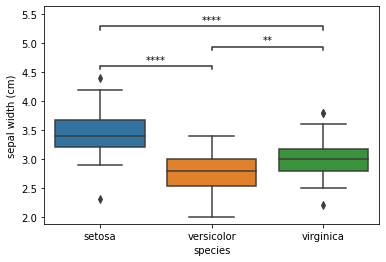

In [37]:
from statannot import add_stat_annotation

x = "species"
y = "sepal width (cm)"
order = ['setosa', 'versicolor', 'virginica']
ax = sns.boxplot(data=iris_df, x=x, y=y, order=order)
test_results = add_stat_annotation(ax, data=iris_df, x=x, y=y, order=order,
                                   box_pairs=[("setosa", "versicolor"), ("setosa", "virginica"), ("versicolor", "virginica")],
                                   test='t-test_ind', text_format='star',
                                   loc='inside', verbose=1)